In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Анализ датасета

In [14]:
df = pd.read_csv('train.csv', index_col='order_id')
df

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
order_id,,,,,,,,,,,,,,,,,,,,,
5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.00,0,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.00,0,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.00,0,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.00,0,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
5498647,0.0,0,0,1,0.0,0,9999,0.0,0.00,0,...,0.0,0,0.00,0,0,5,35000,34,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697173,0.0,0,0,3,0.0,0,733,0.0,0.00,0,...,0.0,0,0.00,0,0,3,35000,60,NaN,0
6697212,0.0,1,25400,3,9500.0,17750,49,0.0,0.00,25400,...,9500.0,5,0.00,1,0,5,20000,7,NaN,0
6697215,1000.0,0,64490,2,0.0,1000,414,0.0,0.00,0,...,0.0,0,0.00,0,0,4,35000,94,NaN,0


In [15]:
df.columns

Index(['cred_sum_cc_all', 'mfo_inqs_count_month', 'all_closed_creds_sum_all',
       'bank_inqs_count_quarter', 'cred_max_overdue_max_ly',
       'all_active_creds_sum_all', 'mfo_last_days_all', 'cred_sum_cc_ly',
       'cred_sum_debt_all_all', 'all_closed_creds_sum_ly',
       'mfo_cred_mean_sum_3lm', 'delay_more_sum_all', 'all_creds_count_all',
       'cred_day_overdue_all_sum_all', 'cred_max_overdue_max_3lm',
       'mfo_closed_count_ly', 'cred_sum_overdue_cc_all',
       'count_overdue_all_3lm', 'all_creds_count_lm', 'work_code',
       'month_income', 'region', 'bad', 'approved'],
      dtype='object')

In [16]:
# Сумма кредитов
money_cols = ['all_active_creds_sum_all', 'all_closed_creds_sum_all', 'all_closed_creds_sum_ly', 'cred_sum_cc_all', 'cred_sum_cc_ly', 'mfo_cred_mean_sum_3lm']

# Количество кредитов
count_cols = ['all_creds_count_all', 'all_creds_count_lm', 'bank_inqs_count_quarter', 'mfo_last_days_all', 'mfo_closed_count_ly', 'mfo_inqs_count_month']

# Долги
debt_cols = ['cred_sum_debt_all_all', 'cred_day_overdue_all_sum_all', 'cred_sum_overdue_cc_all',  'cred_max_overdue_max_ly', 'cred_max_overdue_max_3lm', 'delay_more_sum_all', 'count_overdue_all_3lm']

#Клиент
client_cols = ['work_code', 'month_income', 'region']


In [17]:
len(money_cols+count_cols+debt_cols+client_cols)+2, len(df.columns)

(24, 24)

In [18]:
appr_df = df[df.approved == 1]
appr_df = appr_df.drop('approved', axis=1)

## Client columns

In [19]:
len(client_cols)

3

In [23]:
sns.set_style('white')
sns.set_context('paper',font_scale=1.5)

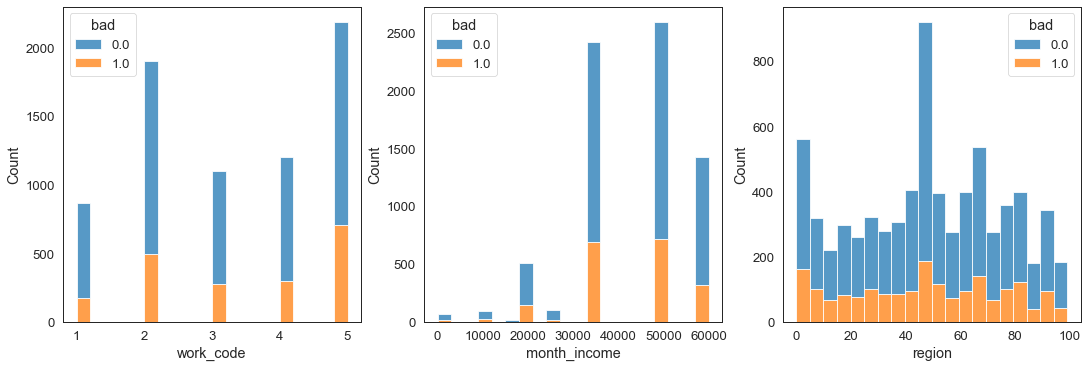

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(5*3, 5*1), constrained_layout=True)

for ax, title in zip(axes.flat, client_cols):
    sns.histplot(data=appr_df, x=title, hue='bad', multiple='stack', ax=ax, bins=20)

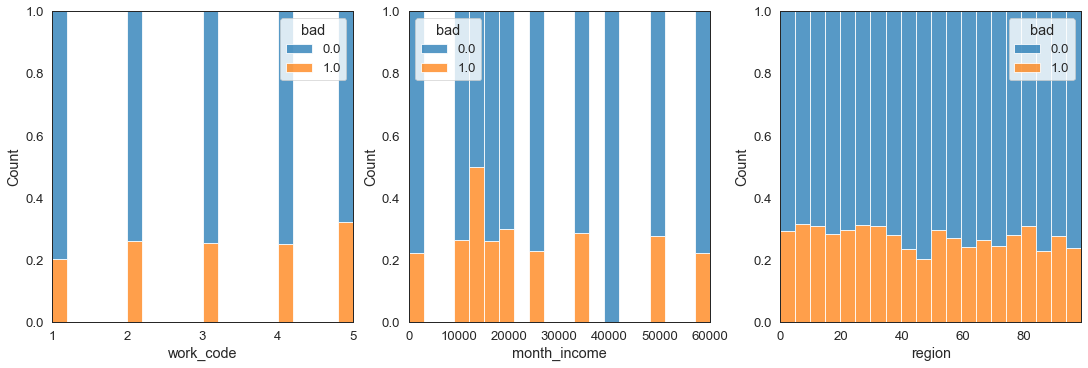

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(5*3, 5*1), constrained_layout=True)

for ax, title in zip(axes.flat, client_cols):
    sns.histplot(data=appr_df, x=title, hue='bad', multiple="fill", ax=ax, bins=20)

In [26]:
#new columns

mean_region_income = df.groupby(by='region').mean().month_income
mean_work_income = df.groupby(by='work_code').mean().month_income
appr_df['mean_region_income'] = appr_df.region.apply(lambda x: mean_region_income[x])
appr_df['mean_work_income'] = appr_df.work_code.apply(lambda x: mean_work_income[x])

appr_df['relative_region_income'] =  appr_df['month_income'] / appr_df['mean_region_income']
appr_df['relative_work_income'] =  appr_df['month_income'] / appr_df['mean_work_income'] 



new_client_cols = client_cols + ['mean_region_income', 'mean_work_income', 'relative_region_income', 'relative_work_income']

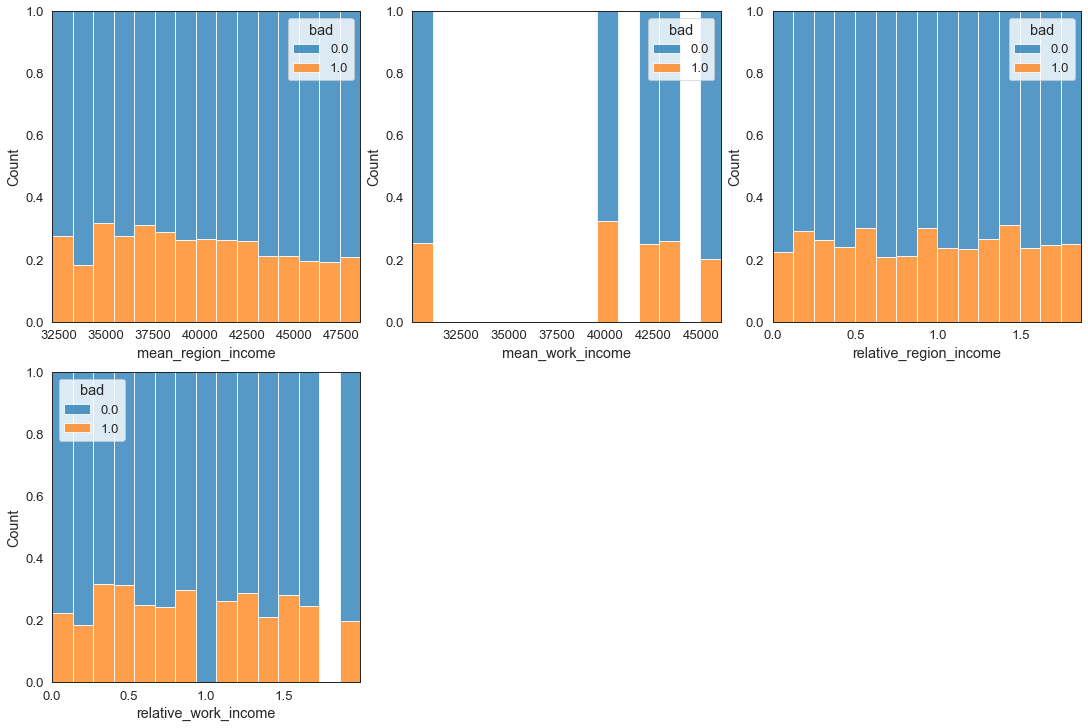

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(5*3, 5*2), constrained_layout=True)

for ax, title in zip(axes.flat, new_client_cols[len(client_cols):]):
    sns.histplot(data=appr_df, x=title, hue='bad', multiple="fill", ax=ax, bins=15)
    
fig.delaxes(axes.flat[-1])
fig.delaxes(axes.flat[-2])

## Money columns

In [28]:
len(money_cols)

6

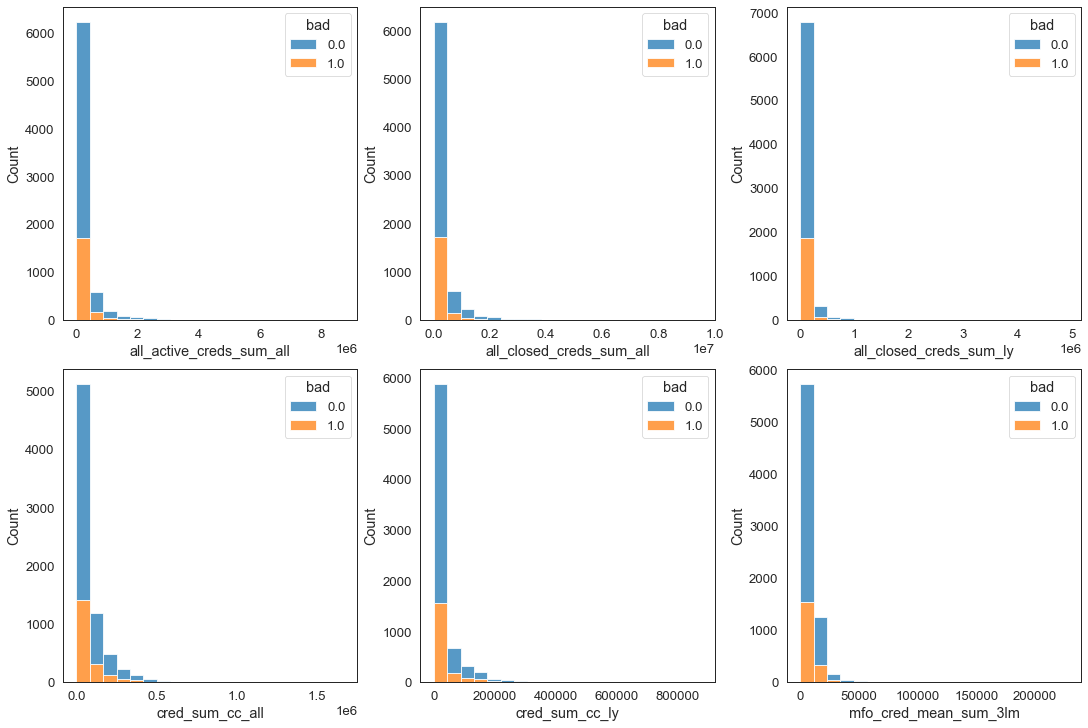

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(5*3, 5*2), constrained_layout=True)

for ax, title in zip(axes.flat, money_cols):
    sns.histplot(data=appr_df, x=title, hue='bad', multiple="stack", ax=ax, bins=20)

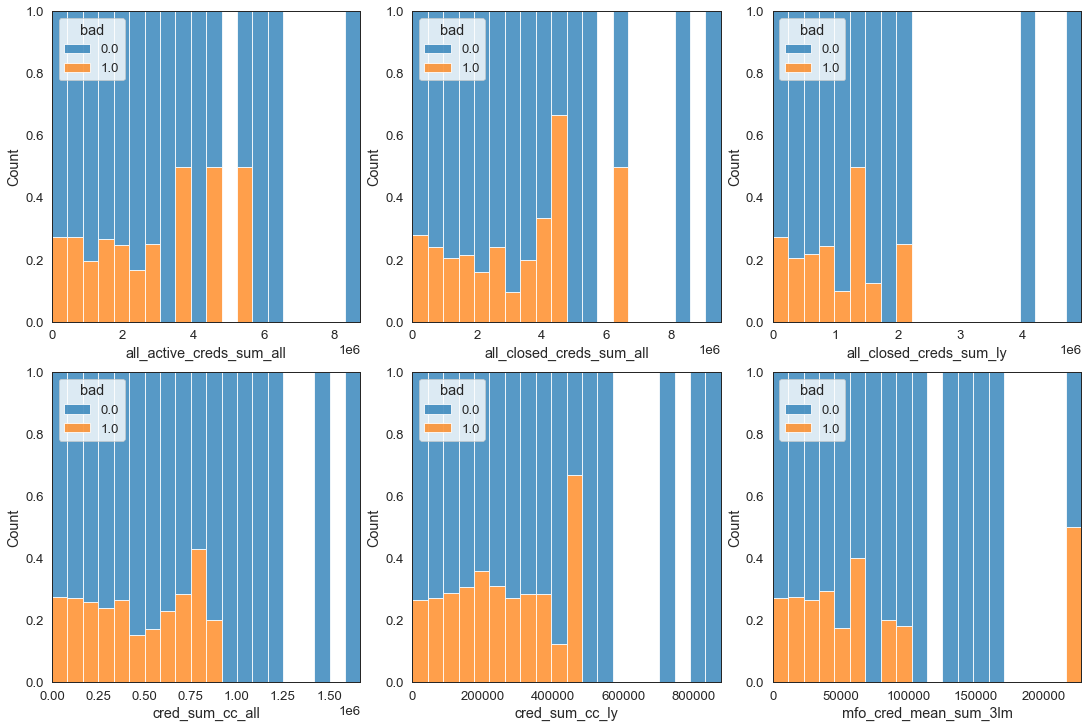

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(5*3, 5*2), constrained_layout=True)

for ax, title in zip(axes.flat, money_cols):
    sns.histplot(data=appr_df, x=title, hue='bad', ax=ax, multiple="fill", bins=20)

In [31]:
#Доп колонки

#before year
appr_df['all_closed_creds_sum_by'] = appr_df['all_closed_creds_sum_all'] - appr_df['all_closed_creds_sum_ly']
appr_df['cred_sum_cc_by'] = appr_df['cred_sum_cc_all'] - appr_df['cred_sum_cc_ly']

#relative values
appr_df['relative_active_creds_sum_hist'] = appr_df['all_active_creds_sum_all'] / (appr_df['all_active_creds_sum_all'] + appr_df['all_closed_creds_sum_all']+1)
appr_df['relative_active_creds_sum_all'] = appr_df['all_active_creds_sum_all'] / appr_df['mean_region_income']

appr_df['relative_cred_sum_cc_hist'] = appr_df['cred_sum_cc_ly'] / (appr_df['cred_sum_cc_all']+1)
appr_df['relative_cred_sum_cc_ly'] = appr_df['cred_sum_cc_ly'] / (appr_df['month_income'] + 1)
appr_df['relative_cred_sum_cc_by'] = appr_df['cred_sum_cc_by'] / (appr_df['month_income'] + 1)
appr_df['relative_cred_sum_cc_all'] = appr_df['cred_sum_cc_all'] / (appr_df['month_income'] + 1)



appr_df['relative_mfo_cred_mean_sum_3lm'] = appr_df['mfo_cred_mean_sum_3lm'] / (appr_df['month_income'] + 1)



new_money_cols =  money_cols + ['all_closed_creds_sum_by', 'cred_sum_cc_by', 'relative_active_creds_sum_hist', 
                                'relative_active_creds_sum_all', 'relative_cred_sum_cc_hist', 'relative_cred_sum_cc_all', 
                                'relative_cred_sum_cc_ly', 'relative_cred_sum_cc_by', 'relative_mfo_cred_mean_sum_3lm']

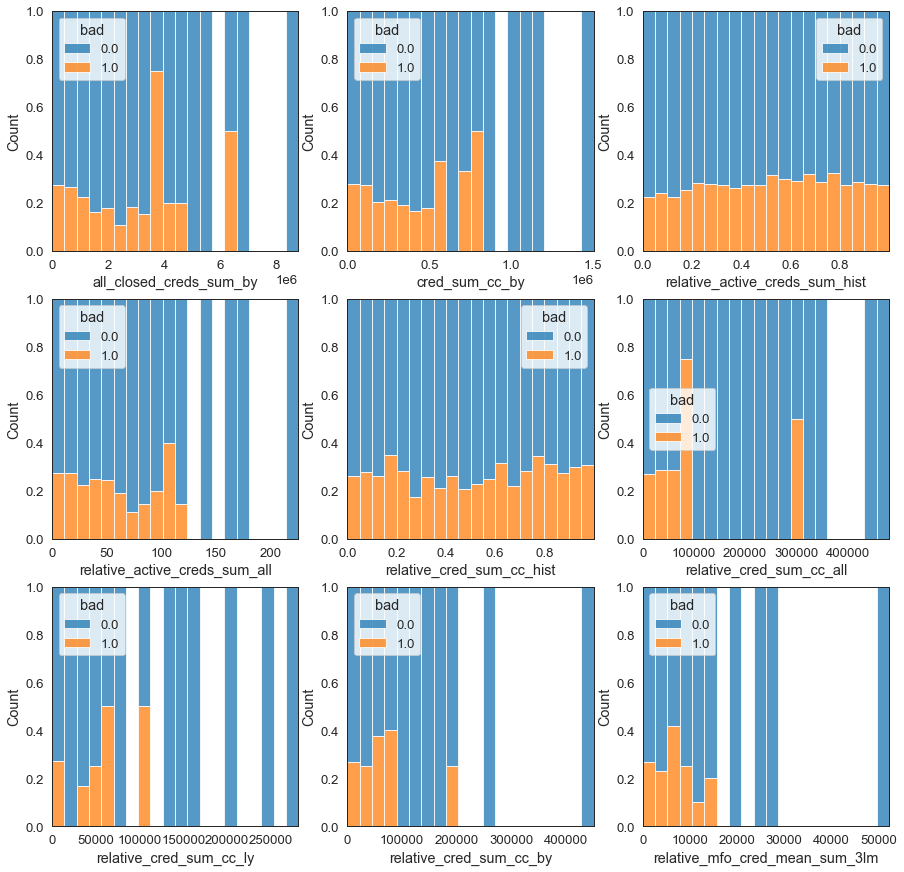

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(5*3, 5*3))

for ax, title in zip(axes.flat, new_money_cols[len(money_cols):]):
    sns.histplot(data=appr_df, x=title, hue='bad', ax=ax, multiple="fill", bins=20)

## Count columns

In [42]:
len(count_cols)

6

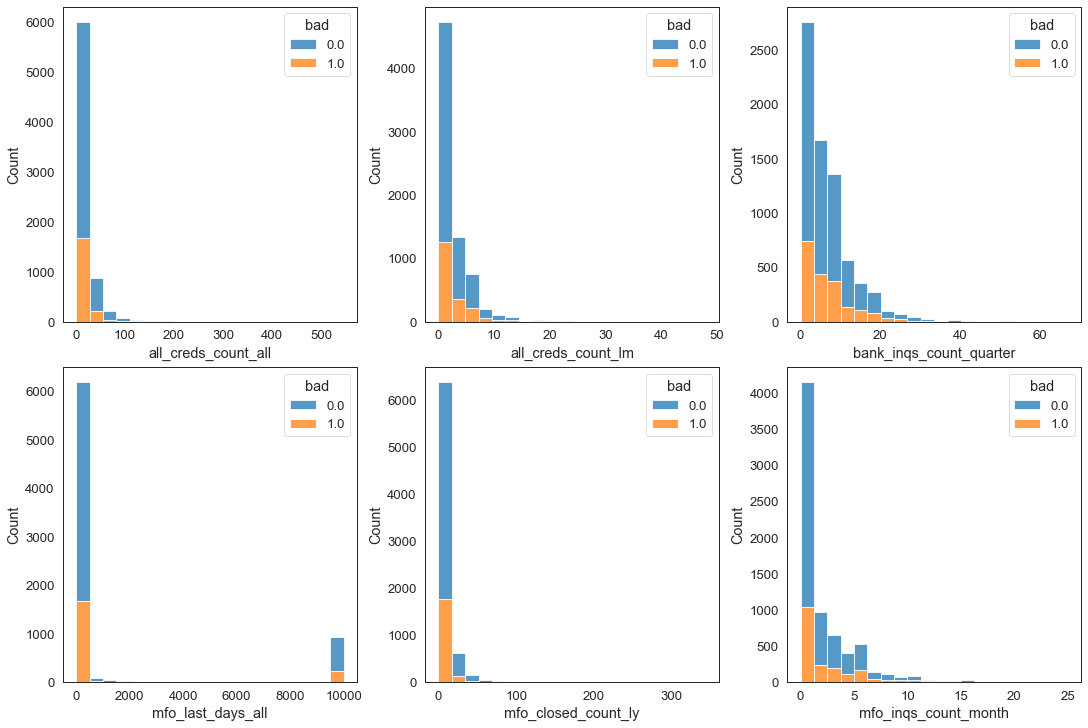

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(5*3, 5*2), constrained_layout=True)

for ax, title in zip(axes.flat, count_cols):
    sns.histplot(data=appr_df, x=title, hue='bad', ax=ax, multiple='stack', bins=20)

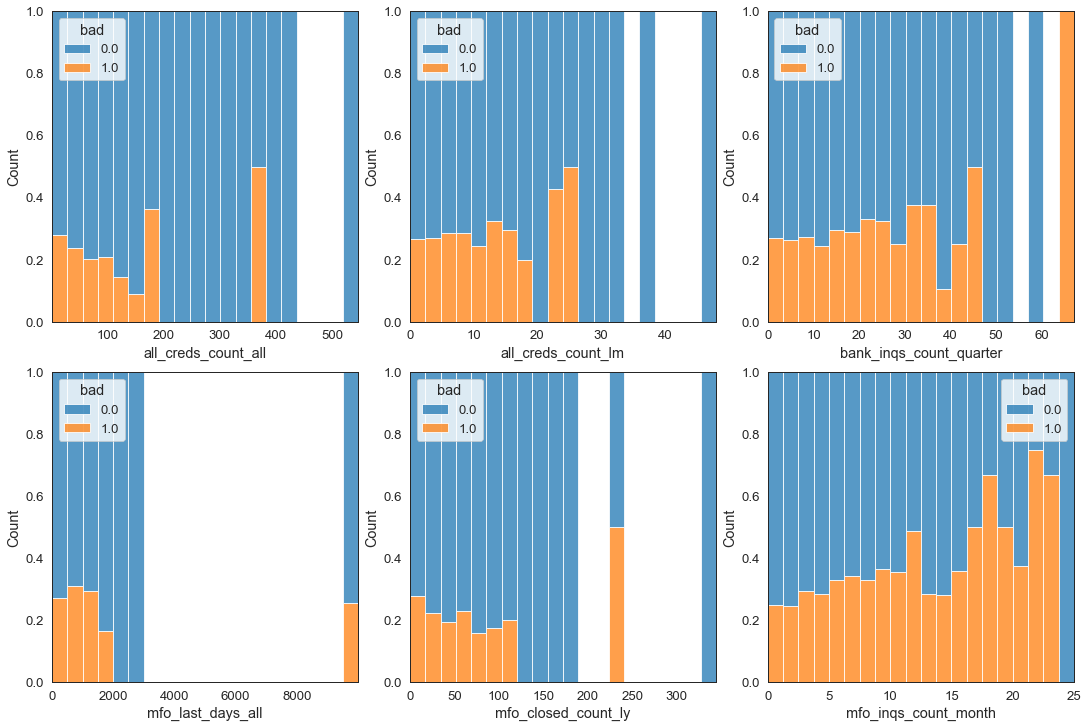

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(5*3, 5*2), constrained_layout=True)

for ax, title in zip(axes.flat, count_cols):
    sns.histplot(data=appr_df, x=title, hue='bad', ax=ax, multiple="fill", bins=20)

In [42]:
#Доп колонки

#before mounth
appr_df['all_creds_count_bm'] = appr_df['all_creds_count_all'] - appr_df['all_creds_count_lm']

#relative values
appr_df['relative_creds_count_ly'] = appr_df['all_creds_count_lm'] / (appr_df['all_creds_count_all'] + 1)

new_count_cols = count_cols + ['all_creds_count_bm', 'relative_creds_count_ly']

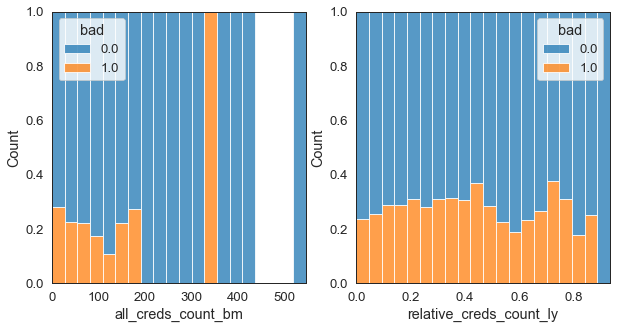

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(5*2, 5*1))

for ax, title in zip(axes.flat, new_count_cols[len(count_cols):]):
    sns.histplot(data=appr_df, x=title, hue='bad', ax=ax, multiple="fill", bins=20)

## Долги

In [51]:
len(debt_cols)

7

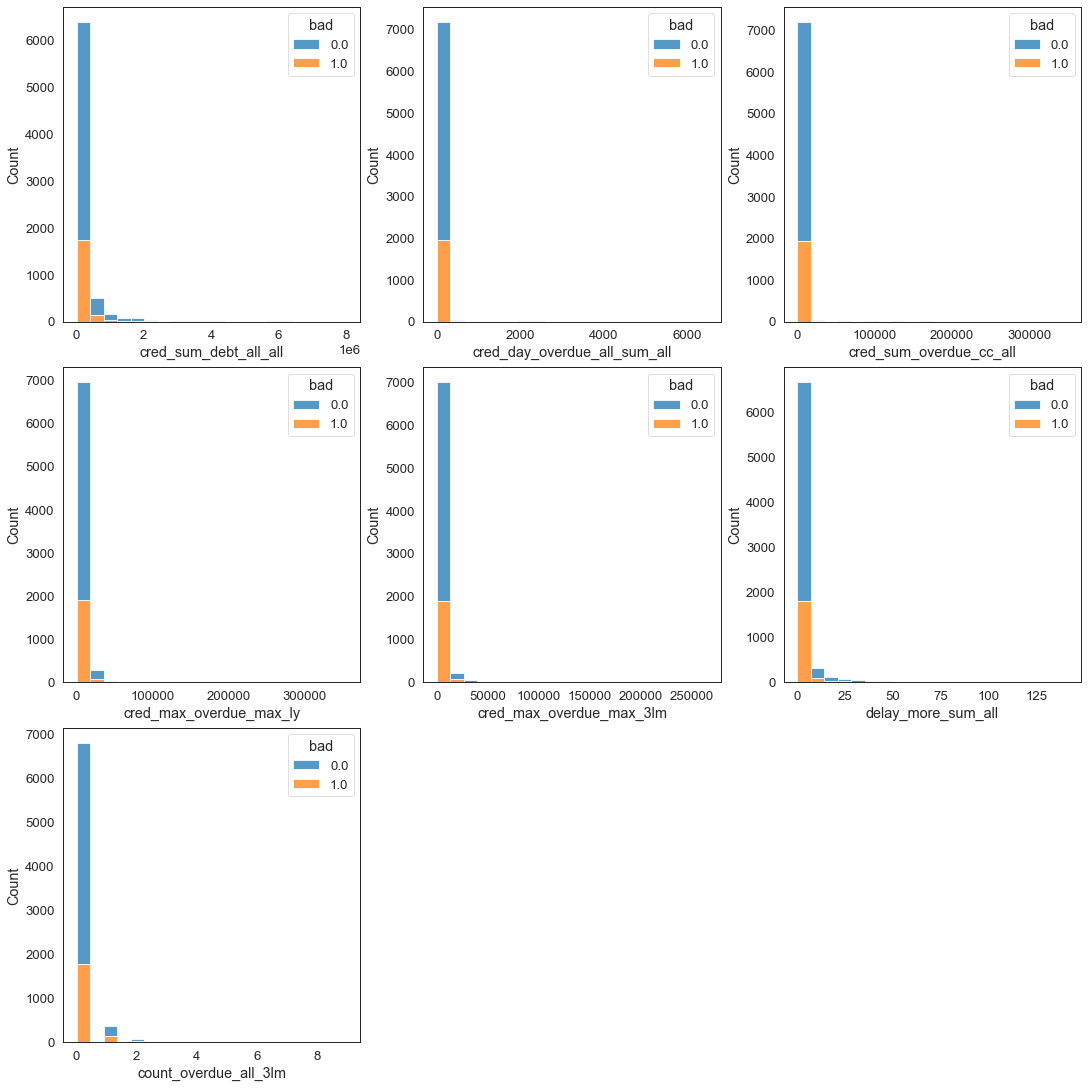

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(5*3, 5*3), constrained_layout=True)

for ax, title in zip(axes.flat, debt_cols):
    sns.histplot(data=appr_df, x=title, hue='bad', multiple="stack",  ax=ax, bins=20)
    
fig.delaxes(axes.flat[-1])
fig.delaxes(axes.flat[-2])

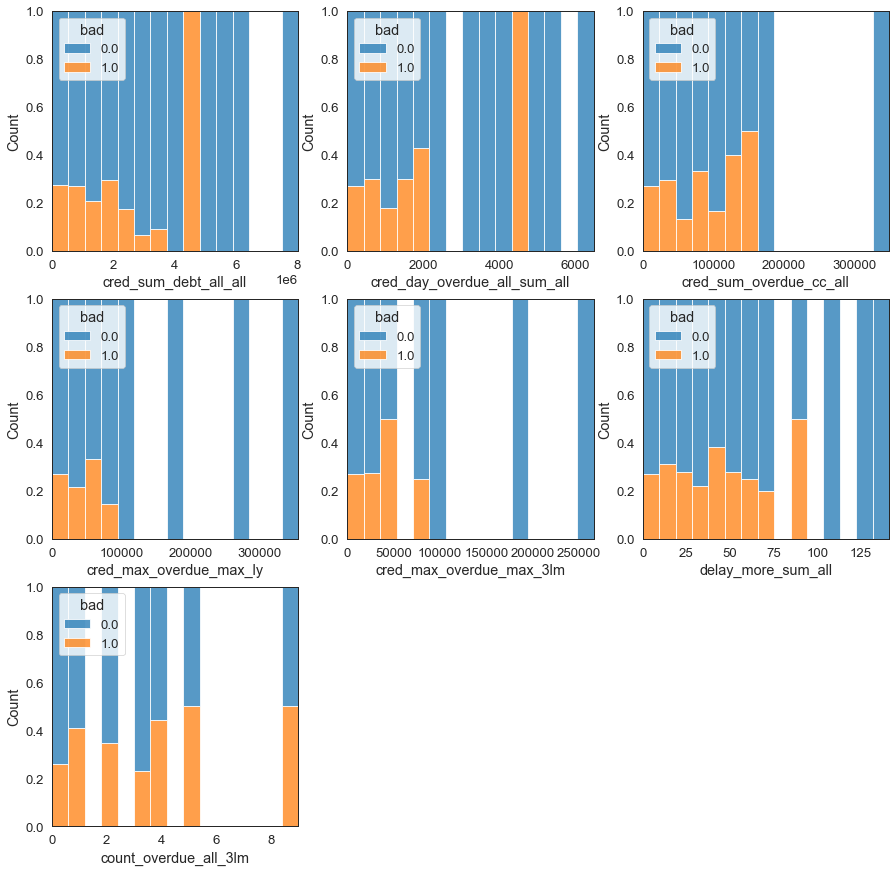

In [47]:
fig, axes = plt.subplots(3, 3, figsize=(5*3, 5*3))

for ax, title in zip(axes.flat, debt_cols):
    sns.histplot(data=appr_df, x=title, hue='bad', multiple="fill", ax=ax, bins=15)
    
fig.delaxes(axes.flat[-1])
fig.delaxes(axes.flat[-2])

In [50]:
#additional columns

#relative values
appr_df['relative_cred_debt_all'] =  appr_df['cred_sum_debt_all_all'] / (appr_df['month_income'] + 1)
appr_df['relative_cc_debt_all'] =  appr_df['cred_sum_overdue_cc_all'] / (appr_df['month_income'] + 1)

In [51]:
new_debt_cols = debt_cols + ['relative_cred_debt_all', 'relative_cc_debt_all']

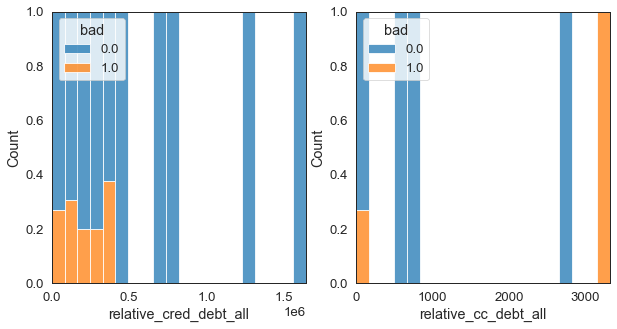

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(5*2, 5*1))

for ax, title in zip(axes.flat, new_debt_cols[len(debt_cols):]):
    sns.histplot(data=appr_df, x=title, hue='bad', ax=ax, multiple="fill", bins=20)

# Target columns

In [154]:
bad_dist = df.bad.value_counts(normalize=True)
approved_dist = df.approved.value_counts(normalize=True)

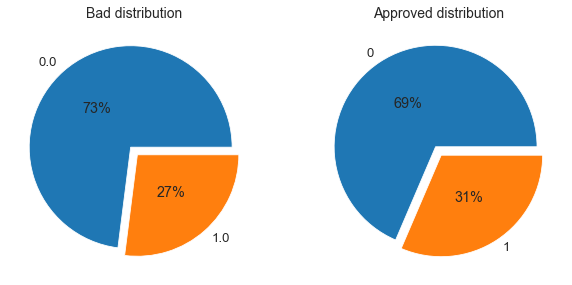

In [159]:
pie, axes = plt.subplots(1, 2, figsize=[5*2, 5])
titles = ['Bad', 'Approved']

for ax, dist, title in zip(axes, [bad_dist, approved_dist], titles):
    labels = dist.keys()
    ax.pie(x=dist, autopct="%.0f%%", explode=[0.05]*len(bad_dist), labels=labels, pctdistance=0.5)
    ax.set_title(f"{title} distribution", fontsize=14)

## Построение моделей

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

from sklearn.ensemble import RandomForestClassifier

In [54]:
#Клиент
client_cols = ['work_code', 'month_income', 'region']
new_client_cols = client_cols + ['mean_region_income', 'mean_work_income', 'relative_region_income', 'relative_work_income']

# Сумма кредитов
money_cols = ['all_active_creds_sum_all', 'all_closed_creds_sum_all', 'all_closed_creds_sum_ly', 'cred_sum_cc_all', 'cred_sum_cc_ly', 'mfo_cred_mean_sum_3lm']
new_money_cols =  money_cols + ['all_closed_creds_sum_by', 'cred_sum_cc_by', 'relative_active_creds_sum_hist', 
                                'relative_active_creds_sum_all', 'relative_cred_sum_cc_hist', 'relative_cred_sum_cc_all', 
                                'relative_cred_sum_cc_ly', 'relative_cred_sum_cc_by', 'relative_mfo_cred_mean_sum_3lm']

# Количество кредитов
count_cols = ['all_creds_count_all', 'all_creds_count_lm', 'bank_inqs_count_quarter', 'mfo_last_days_all', 'mfo_closed_count_ly', 'mfo_inqs_count_month']
new_count_cols = count_cols + ['all_creds_count_bm', 'relative_creds_count_ly']

# Долги
debt_cols = ['cred_sum_debt_all_all', 'cred_day_overdue_all_sum_all', 'cred_sum_overdue_cc_all',  'cred_max_overdue_max_ly', 'cred_max_overdue_max_3lm', 'delay_more_sum_all', 'count_overdue_all_3lm']
new_debt_cols = debt_cols + ['relative_cred_debt_all', 'relative_cc_debt_all']




In [55]:
def transform_df(prev_df, mean_region_income=None, mean_work_income=None, return_means=False):
    
    df =prev_df.copy()
    
    #client columns:
    if mean_region_income is None:
        mean_region_income = df.groupby(by='region').mean().month_income
    if mean_work_income is None:
        mean_work_income = df.groupby(by='work_code').mean().month_income
        
    df['mean_region_income'] = df.region.apply(lambda x: mean_region_income[x])
    df['mean_work_income'] = df.work_code.apply(lambda x: mean_work_income[x])

    df['relative_region_income'] =  df['month_income'] / df['mean_region_income']
    df['relative_work_income'] =  df['month_income'] / df['mean_work_income'] 

    #money columns:
    df['all_closed_creds_sum_by'] = df['all_closed_creds_sum_all'] - df['all_closed_creds_sum_ly']
    df['cred_sum_cc_by'] = df['cred_sum_cc_all'] - df['cred_sum_cc_ly']

    df['relative_active_creds_sum_hist'] = df['all_active_creds_sum_all'] / (df['all_active_creds_sum_all'] + df['all_closed_creds_sum_all']+1)
    df['relative_active_creds_sum_all'] = df['all_active_creds_sum_all'] / df['mean_region_income']

    df['relative_cred_sum_cc_hist'] = df['cred_sum_cc_ly'] / (df['cred_sum_cc_all'] + 1)
    df['relative_cred_sum_cc_ly'] = df['cred_sum_cc_ly'] / (df['month_income'] + 1)
    df['relative_cred_sum_cc_by'] = df['cred_sum_cc_by'] / (df['month_income'] + 1)
    df['relative_cred_sum_cc_all'] = df['cred_sum_cc_all'] / (df['month_income'] + 1)
    df['relative_mfo_cred_mean_sum_3lm'] = df['mfo_cred_mean_sum_3lm'] / (df['month_income'] + 1)
    
    #count_columns
    df['all_creds_count_bm'] = df['all_creds_count_all'] - df['all_creds_count_lm']
    df['relative_creds_count_ly'] = df['all_creds_count_lm'] / (df['all_creds_count_all'] + 1)
    
    #debt_columns
    df['relative_cred_debt_all'] =  df['cred_sum_debt_all_all'] / (df['month_income'] + 1)
    df['relative_cc_debt_all'] =  df['cred_sum_overdue_cc_all'] / (df['month_income'] + 1)
    
    if return_means is True:
        return df, mean_region_income, mean_work_income
    else:
        return df
    

In [56]:
df = pd.read_csv('train.csv', index_col='order_id')
test_df = pd.read_csv('test.csv', index_col='order_id')

In [57]:
tr_df, mean_region_income, mean_work_income = transform_df(df, return_means=True)
tr_test_df = transform_df(test_df, mean_region_income, mean_work_income)

In [58]:
appr_tr_df = tr_df[tr_df.approved == 1]
appr_test_tr_df = tr_test_df[tr_test_df.approved == 1]

## Модель 1

In [65]:
all_cols = new_money_cols + new_count_cols + new_debt_cols + new_client_cols
X1, X1_test = appr_tr_df[all_cols], appr_test_tr_df[all_cols]
y1, y1_test = appr_tr_df.bad, appr_test_tr_df.bad

In [66]:
X1 = pd.get_dummies(X1, columns=['work_code'])
X1_test = pd.get_dummies(X1_test, columns=['work_code'])
print(len(X1.columns))

43


In [162]:
grid_1 = {
    'n_estimators': [300],
    'criterion': ['gini', 'entropy'],
    'class_weight':['balanced'],
    'min_samples_leaf': [2, 5, 7, 10],
}

In [163]:
model_1 = GridSearchCV(RandomForestClassifier(random_state=42), grid_1, n_jobs=4, scoring='recall')

In [164]:
model_1.fit(X1, y1)

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'n_estimators': [300]},
             scoring='recall')

In [165]:
model_1.best_score_

0.22925040245105674

In [166]:
model_1.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'min_samples_leaf': 10,
 'n_estimators': 300}

In [176]:
predictions = model_1.predict(X1_test)
cm = confusion_matrix(y1_test, predictions, labels=model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

Text(0.5, 1.0, 'Confusion Matrix')

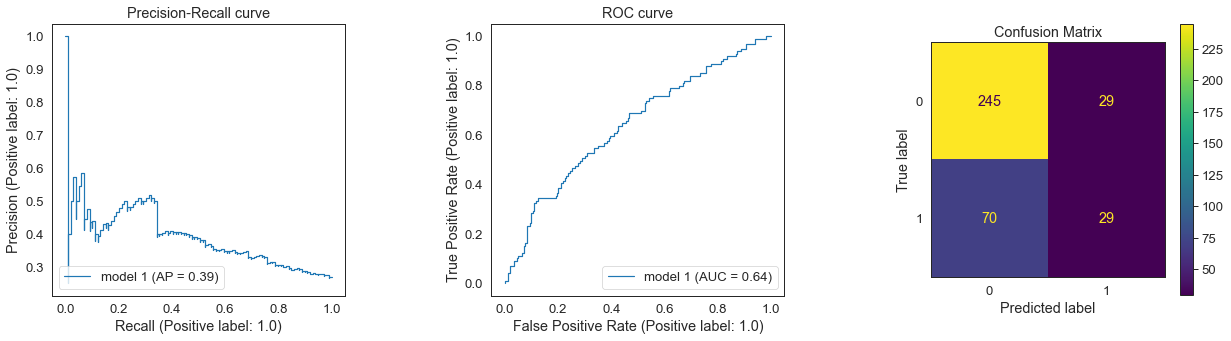

In [177]:
fig, axes = plt.subplots(1, 3, figsize=(7*3, 5*1))
fig.subplots_adjust(wspace=0.5)
plot_precision_recall_curve(model_1, X1_test, y1_test, name='model 1', ax=axes[0])
plot_roc_curve(model_1, X1_test, y1_test, name='model 1', ax=axes[1])
disp.plot(ax=axes[2])

axes[0].set_title('Precision-Recall curve')
axes[1].set_title('ROC curve')
axes[2].set_title('Confusion Matrix')

In [178]:
print('Accuracy:', accuracy_score(y1_test, predictions))
print('Precision:', precision_score(y1_test, predictions))
print('Recall:', recall_score(y1_test, predictions))
print('F1:', f1_score(y1_test, predictions))

Accuracy: 0.7345844504021448
Precision: 0.5
Recall: 0.29292929292929293
F1: 0.36942675159235666


In [187]:
feat_imprt1 = model_1.best_estimator_.feature_importances_
feat_df1 = pd.DataFrame(data=zip(X1.columns, feat_imprt1), columns =['feature', 'importance']).sort_values(by='importance', ascending=False)
feat_df1.reset_index(drop=True).head(10)

,feature,importance
0,relative_active_creds_sum_hist,0.044813
1,mean_region_income,0.044701
2,all_closed_creds_sum_ly,0.043739
3,all_closed_creds_sum_all,0.040242
4,relative_region_income,0.039239
5,region,0.038088
6,relative_cred_debt_all,0.037763
7,cred_sum_debt_all_all,0.036443
8,relative_mfo_cred_mean_sum_3lm,0.036023
9,all_active_creds_sum_all,0.035957


## Модель 2

In [318]:
X2, X2_test = tr_df[all_cols], tr_test_df[all_cols]
y2, y2_test = df.approved, test_df.approved

In [319]:
X2 = pd.get_dummies(X2, columns=['work_code'])
X2_test = pd.get_dummies(X2_test, columns=['work_code'])

In [22]:
#X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [190]:
grid_2 = {
    'n_estimators': [300],
    'criterion': ['gini', 'entropy'],
    'class_weight':['balanced'],
    'min_samples_leaf': [2, 5, 7, 10],
}

In [193]:
model_2 = GridSearchCV(RandomForestClassifier(random_state=42), grid_2, n_jobs=4, scoring='roc_auc')

In [194]:
model_2.fit(X2, y2)

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'n_estimators': [300]},
             scoring='roc_auc')

In [195]:
model_2.best_score_

0.9583761670647812

In [196]:
model_2.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'min_samples_leaf': 5,
 'n_estimators': 300}

In [197]:
predictions_2 = model_2.predict(X2_test)
cm_2 = confusion_matrix(y2_test, predictions_2, labels=model_2.classes_)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)

Text(0.5, 1.0, 'Confusion Matrix')

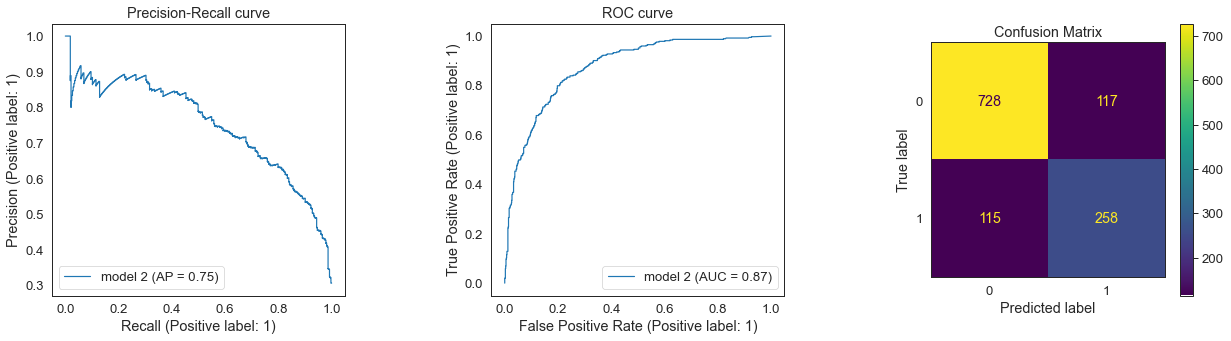

In [199]:
fig, axes = plt.subplots(1, 3, figsize=(7*3, 5*1))
fig.subplots_adjust(wspace=0.5)
plot_precision_recall_curve(model_2, X2_test, y2_test, name='model 2', ax=axes[0])
plot_roc_curve(model_2, X2_test, y2_test, name='model 2', ax=axes[1])
disp_2.plot(ax=axes[2])

axes[0].set_title('Precision-Recall curve')
axes[1].set_title('ROC curve')
axes[2].set_title('Confusion Matrix')

In [200]:
print('Accuracy:', accuracy_score(y2_test, predictions_2))
print('Precision:', precision_score(y2_test, predictions_2))
print('Recall:', recall_score(y2_test, predictions_2))
print('F1:', f1_score(y2_test, predictions_2))

Accuracy: 0.8095238095238095
Precision: 0.688
Recall: 0.6916890080428955
F1: 0.6898395721925134


In [204]:
feat_imprt2 = model_2.best_estimator_.feature_importances_
feat_df2 = pd.DataFrame(data=zip(X2.columns, feat_imprt2), columns =['feature', 'importance']).sort_values(by='importance', ascending=False)
feat_df2.reset_index(drop=True).head(10)

,feature,importance
0,cred_day_overdue_all_sum_all,0.113996
1,cred_sum_debt_all_all,0.096418
2,relative_cred_debt_all,0.084321
3,all_closed_creds_sum_ly,0.053777
4,mfo_cred_mean_sum_3lm,0.037210
5,all_closed_creds_sum_all,0.033938
6,all_creds_count_all,0.033628
7,bank_inqs_count_quarter,0.032679
8,mfo_closed_count_ly,0.032155
9,relative_mfo_cred_mean_sum_3lm,0.030863


# Сравнение распределения признаков на двух выборках

### Вариант 1: Посчитаем среднее и дичсперисию для каждого распределения и сравним их

In [214]:
tr_df_stat = tr_df[all_cols].describe().T[['mean', 'std']]
appr_tr_df_stat = appr_tr_df[all_cols].describe().T[['mean', 'std']]


In [215]:
diff_stat = pd.DataFrame(index=tr_df_stat.index)

In [216]:
diff_stat['mean diff'] = np.abs(tr_df_stat['mean'] - appr_tr_df_stat['mean']) / (tr_df_stat['mean'] + appr_tr_df_stat['mean']) * 2
#diff_stat['mean_std'] = np.abs(tr_df_stat['std'] - appr_tr_df_stat['std']) / (tr_df_stat['std'] + appr_tr_df_stat['std']) * 2

In [221]:
top_diff_cols = diff_stat.sort_values(by='mean diff', ascending=False).index[:10]

In [220]:
diff_stat.sort_values(by='mean diff', ascending=False).head(9).round(2)

,mean diff
relative_cc_debt_all,1.91
cred_day_overdue_all_sum_all,1.73
cred_sum_overdue_cc_all,1.49
delay_more_sum_all,0.83
all_closed_creds_sum_ly,0.82
cred_sum_cc_ly,0.79
mfo_closed_count_ly,0.78
all_creds_count_lm,0.77
cred_sum_debt_all_all,0.75


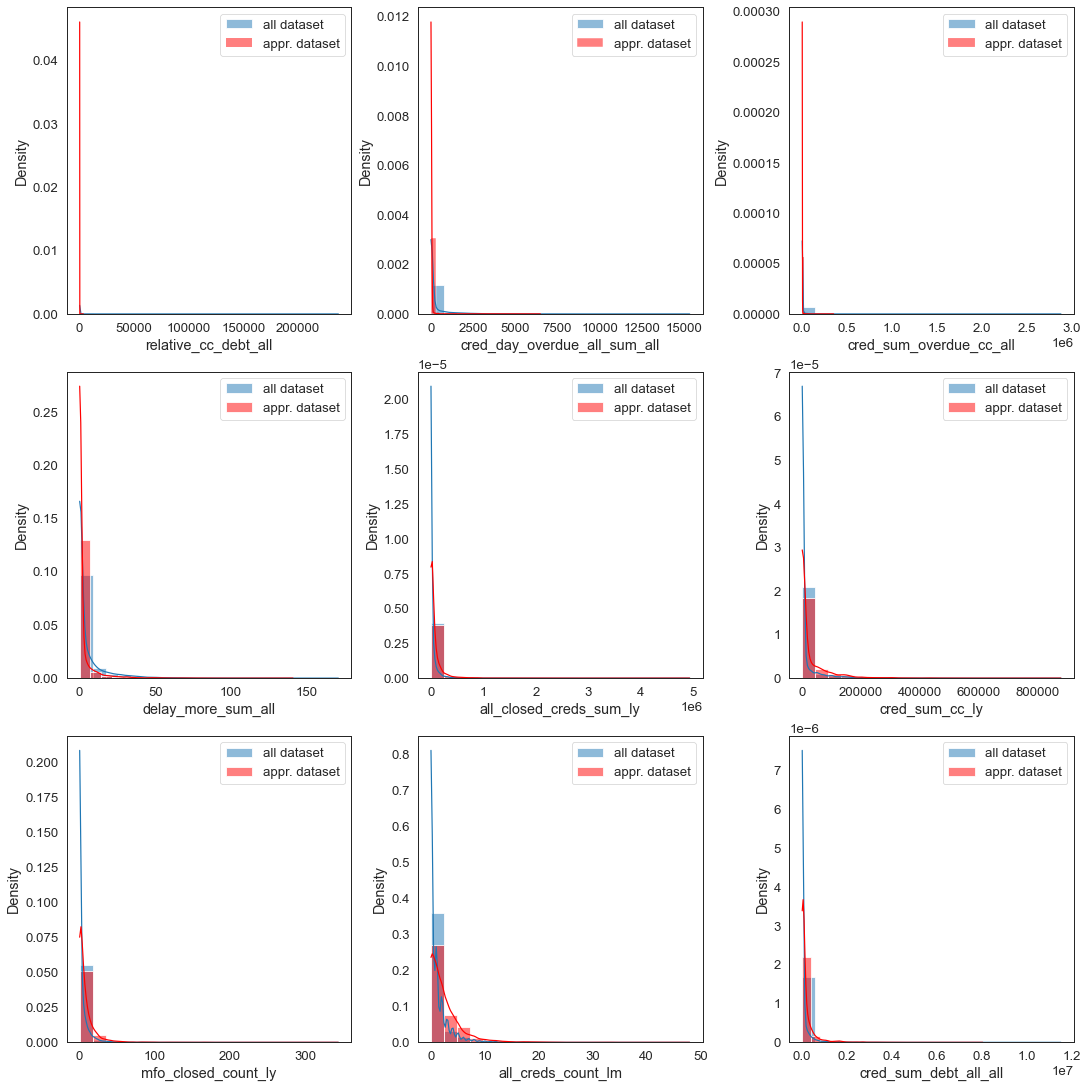

In [224]:
fig, axes = plt.subplots(3, 3, figsize=(5*3, 5*3), constrained_layout=True)

for ax, title in zip(axes.flat, top_diff_cols):
    sns.histplot(data=tr_df, x=title, ax=ax, bins=20, kde=True, stat='density', label='all dataset')    
    sns.histplot(data=appr_tr_df, x=title, ax=ax, bins=20, kde=True, stat='density', label='appr. dataset', color='r')
    ax.legend()

# Сравнение моделей

### 1. Оцениваем вероятность дефолта для каждой заявки

1.1 Строим модель 1 и модель 2.\
1.2 Считаем моделью 1 вероятность принадлежности к классу bad=1 на всем
тестовом наборе test.csv

In [225]:
tr_test_df['model_1_proba'] = model_1.predict_proba(X2_test)[:, 1]

tr_test_df['model_2_proba'] = model_2.predict_proba(X2_test)[:, 0]

### 2. Оцениваем badrate для выданных кредитов

Выбираем выданные заявки (bad != nan), группируем заявки в 7 групп по
вероятности принадлежности заявки к классу bad=1, рассчитанном в п.1.2.
Считаем badrate в каждом интервале. Badrate - количество плохих (bad=1)
кредитов в бине, поделенное на количество всех кредитов в бине. Строим
график stackedbar. Границы интервалов необходимо подобрать так, чтобы
badrate в соседних интервалах отличался.

In [226]:
appr_test_df2 = tr_test_df[tr_test_df.approved == 1]

In [279]:

appr_test_df2['group'], bins = pd.cut(appr_test_df2['model_1_proba'], bins=[0, 0.23, 0.28, 0.36, 0.48, 0.58, 0.64, 0.99], retbins=True, labels=False)
bins

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([0.  , 0.23, 0.28, 0.36, 0.48, 0.58, 0.64, 0.99])

Text(0.5, 1.0, 'Percentage Stacked Bar Chart')

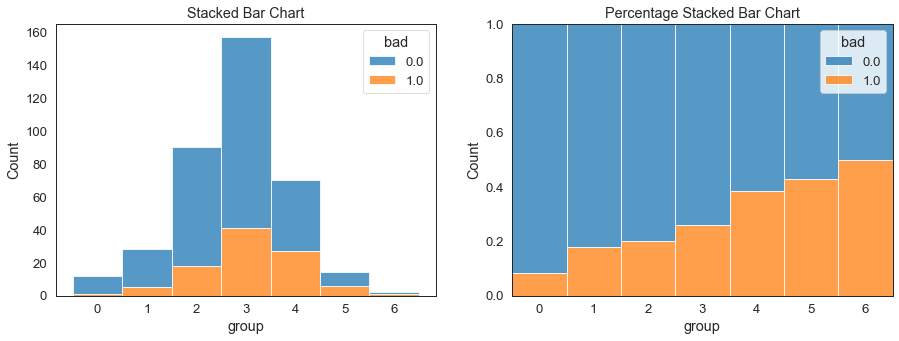

In [281]:
fig, axes = plt.subplots(1, 2, figsize=(5*3, 5*1))

sns.histplot(data=appr_test_df2, x='group', hue='bad', multiple="stack", discrete=True, ax=axes[0])
sns.histplot(data=appr_test_df2, x='group', hue='bad', multiple="fill", discrete=True, ax=axes[1])

axes[0].set_title('Stacked Bar Chart')
axes[1].set_title('Percentage Stacked Bar Chart')

### 3. Оцениваем badrate для отклоненных

3.1. Выбираем невыданные заявки (bad=nan). Разбиваем на интервалы по
вероятности принадлежности заявки к классу bad=1 (рассчитанном в п.1.2).
Границы интервалов берем такие же как в п.2.\
3.2. В каждом бине размечаем случайную часть заявок как “плохие” bad=1.
Количество плохих в бине должно соответствовать badrate, рассчитанному в п.2
для данного бина.

In [283]:
not_appr_test_df2 = tr_test_df[tr_test_df.approved == 0]

not_appr_test_df2['group'] = pd.cut(not_appr_test_df2['model_1_proba'], bins=bins, labels=False)

In [284]:
badtrade_group = appr_test_df2.groupby('group').bad.mean()
badtrade_group

group
0    0.083333
1    0.178571
2    0.200000
3    0.261146
4    0.385714
5    0.428571
6    0.500000
Name: bad, dtype: float64

In [285]:
np.random.seed(25)
for gr in range(7):
    l = len(not_appr_test_df2[not_appr_test_df2.group == gr])
    not_appr_test_df2.loc[not_appr_test_df2.group == gr, 'bad'] = np.random.binomial(n=1, p=badtrade_group[gr], size=l)

D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

<AxesSubplot:xlabel='group', ylabel='Count'>

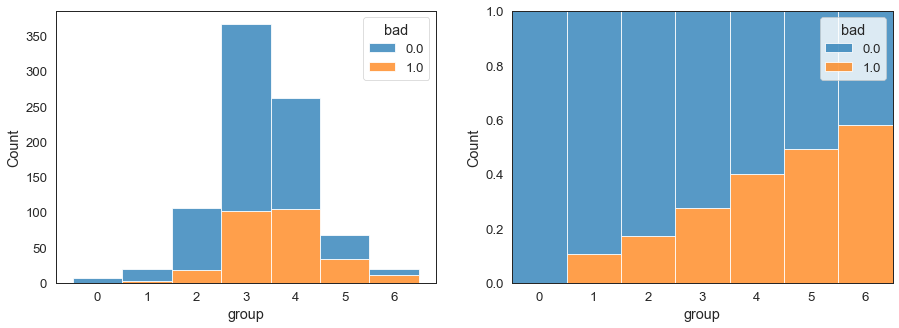

In [286]:
fig, axes = plt.subplots(1, 2, figsize=(5*3, 5*1))

sns.histplot(data=not_appr_test_df2, x='group', hue='bad', multiple="stack", discrete=True, ax=axes[0])
sns.histplot(data=not_appr_test_df2, x='group', hue='bad', multiple="fill", discrete=True, ax=axes[1])

### 4. Оцениваем badrate модели 1 при уровне одобрения 30%

4.1. Смешиваем отклоненные заявки, размеченные в п.3.2, с выданными
заявками.\
4.2. Сортируем полученную выборку по возрастанию вероятности
принадлежности к классу bad=1, рассчитанной в п. 1.2. Выбираем первые 30%
заявок и считаем по ним badrate.\

In [287]:
mixed_df = pd.concat([appr_test_df2, not_appr_test_df2])

In [288]:
sub_df = mixed_df.sort_values('model_1_proba').head(int(0.3*len(mixed_df)))

In [289]:
print("badrate of model 1:", sub_df.bad.mean())

badrate of model 1: 0.18356164383561643


### 5. Оцениваем badrate модели 2 при уровне одобрения 30%

5.1 Считаем моделью 2 вероятность принадлежности к классу approved=0 на
всем тестовом наборе test.csv. Сортируем по возрастанию вероятности.\
5.2 Выбираем первые 30% заявок и считаем по ним badrate.\

In [290]:
sub_df_2 = mixed_df.sort_values('model_2_proba').head(int(0.3*len(mixed_df)))

In [291]:
print("badrate of model 2:", sub_df_2.bad.mean())

badrate of model 2: 0.2493150684931507


### 6. Объяснить почему одна модель получилась лучше другой по целевой метрике.
Целевая метрика - процент “плохих” среди одобренных заявок.

Модель один лучше сработала, чем модель два. Возможные причины:
1. Bad были расчитаны под результаты первой модели
2. Модель 1 обучена, чтобы справлятьяся с результатами, с которыми не справилась модель 2

### 7. Придумать как можно улучшить целевую метрику - процент плохих в 30% одобренных заявках.

Первый вариант - stacking

In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [294]:
class StackingClassifier():
    def __init__(self, model_1, model_2, final_estimator):
        self.model_1 = model_1
        self.model_2 = model_2
        self.final_estimator = final_estimator
    def fit(self, X, y):
        self.predicts_1 = model_1.predict_proba(X)[:, 1]
        self.predicts_2 = model_2.predict_proba(X)[:, 0]
        self.combined_predicts = np.array([self.predicts_1, self.predicts_2]).T
        self.final_estimator.fit(self.combined_predicts, y)
        
    def predict(self, X):
        self.predicts_1 = model_1.predict_proba(X)[:, 1]
        self.predicts_2 = model_2.predict_proba(X)[:, 0]
        self.combined_predicts = np.array([self.predicts_1, self.predicts_2]).T
        return self.final_estimator.predict(self.combined_predicts)
    
    def predict_proba(self, X):
        self.predicts_1 = model_1.predict_proba(X)[:, 1]
        self.predicts_2 = model_2.predict_proba(X)[:, 0]
        self.combined_predicts = np.array([self.predicts_1, self.predicts_2]).T
        return self.final_estimator.predict_proba(self.combined_predicts)

### 1. Обучение на одобренных заявках

In [311]:
stack_clf_1 = StackingClassifier(model_1, model_2, LogisticRegression(penalty='l2', random_state=42))

In [312]:
X3_train, X3_val, y3_train, y3_val = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [313]:
stack_clf_1.fit(X3_train, y3_train)

In [314]:
stack_clf_1.final_estimator.coef_

array([[23.0811762 , -0.74375597]])

In [315]:
stack_clf_1.final_estimator.intercept_

array([-11.53171359])

### 2. Обучение на всем датасете

In [321]:
tr_df['model_1_proba'] = model_1.predict_proba(X2)[:, 1]

In [322]:
appr_df2 = tr_df[tr_df.approved == 1]

In [363]:
appr_df2['group'], bins2 = pd.cut(appr_df2['model_1_proba'], bins=[0, 0.3, 0.4, 0.45, 0.49, 0.51, 0.6, 0.99], retbins=True, labels=False)
bins2

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([0.  , 0.3 , 0.4 , 0.45, 0.49, 0.51, 0.6 , 0.99])

Text(0.5, 1.0, 'Percentage Stacked Bar Chart')

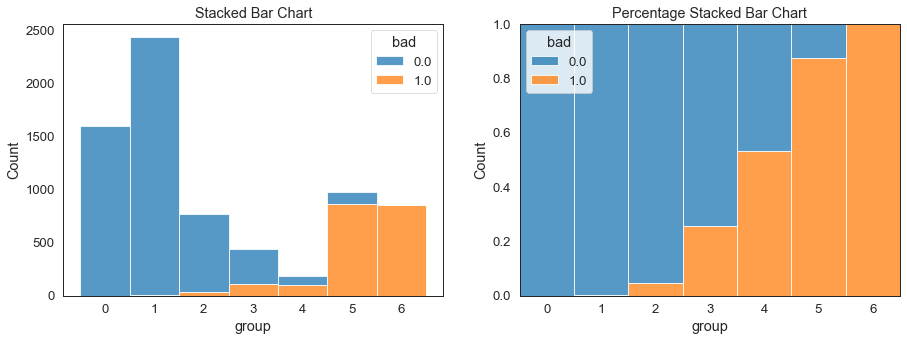

In [364]:
fig, axes = plt.subplots(1, 2, figsize=(5*3, 5*1))

sns.histplot(data=appr_df2, x='group', hue='bad', multiple="stack", discrete=True, ax=axes[0])
sns.histplot(data=appr_df2, x='group', hue='bad', multiple="fill", discrete=True, ax=axes[1])

axes[0].set_title('Stacked Bar Chart')
axes[1].set_title('Percentage Stacked Bar Chart')

In [370]:
badtrade_group2 = appr_df2.groupby('group').bad.mean()
badtrade_group2

group
0    0.000000
1    0.002049
2    0.047059
3    0.255656
4    0.531915
5    0.875510
6    0.998826
Name: bad, dtype: float64

In [371]:
not_appr_df2 = tr_df[tr_df.approved == 0]

In [372]:
not_appr_df2['group'] = pd.cut(not_appr_df2['model_1_proba'], bins=bins2, labels=False)

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [373]:
np.random.seed(25)
for gr in range(7):
    l = len(not_appr_df2[not_appr_df2.group == gr])
    not_appr_df2.loc[not_appr_df2.group == gr, 'bad'] = np.random.binomial(n=1, p=badtrade_group2[gr], size=l)

D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

<AxesSubplot:xlabel='group', ylabel='Count'>

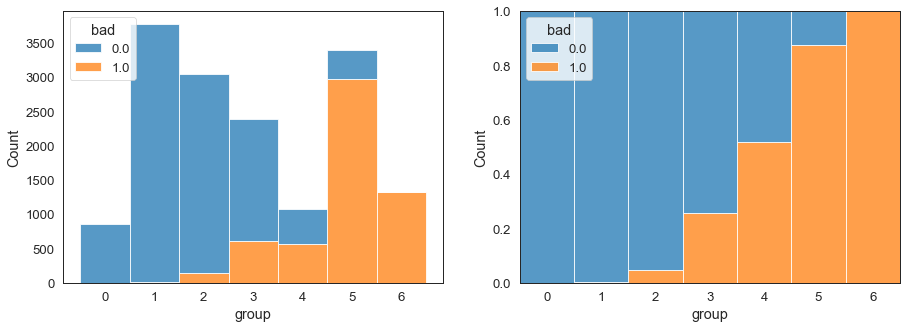

In [374]:
fig, axes = plt.subplots(1, 2, figsize=(5*3, 5*1))

sns.histplot(data=not_appr_df2, x='group', hue='bad', multiple="stack", discrete=True, ax=axes[0])
sns.histplot(data=not_appr_df2, x='group', hue='bad', multiple="fill", discrete=True, ax=axes[1])

In [375]:
mixed_train_df = pd.concat([appr_df2, not_appr_df2])

In [376]:
X4 = pd.get_dummies(mixed_train_df[all_cols], columns=['work_code'])
y4 = mixed_train_df.bad

In [377]:
stack_clf_2 = StackingClassifier(model_1, model_2, LogisticRegression(penalty='l2', random_state=42))

In [378]:
stack_clf_2.fit(X4, y4)

In [379]:
stack_clf_2.final_estimator.coef_

array([[31.23026846,  0.06609749]])

In [381]:
stack_clf_2.final_estimator.intercept_

array([-15.65700075])

### 3. Обучение на всем датасете с доп. разметкой

In [387]:
mixed_train_df['model_2_proba'] = model_2.predict_proba(X4)[:, 0]

In [388]:
mixed_train_df2 = mixed_train_df.copy() 

In [406]:
l = int(len(mixed_train_df2[mixed_train_df2.approved==0])/3)
idx = mixed_train_df2[mixed_train_df2.approved==0].sort_values(by='model_2_proba', ascending=False).head(l).bad.index

Int64Index([5900428, 6602542, 6051121, 6500214, 5541574, 6500204, 5541519,
            6499332, 5599736, 6054910,
            ...
            5594264, 5776139, 6469631, 6651965, 6534324, 5775963, 5898729,
            5988538, 6109646, 5904083],
           dtype='int64', name='order_id', length=5282)

In [415]:
mixed_train_df2.loc[idx, 'bad'] = [1] * l

In [417]:
X5 = pd.get_dummies(mixed_train_df2[all_cols], columns=['work_code'])
y5 = mixed_train_df2.bad

In [434]:
stack_clf_3 = StackingClassifier(model_1, model_2, LogisticRegression(C=1, random_state=42))

In [435]:
stack_clf_3.fit(X5, y5)

In [436]:
stack_clf_3.final_estimator.coef_

array([[18.63485965,  2.3018497 ]])

In [437]:
stack_clf_3.final_estimator.intercept_

array([-10.20326467])

In [438]:
mixed_df_X = pd.get_dummies(mixed_df[all_cols], columns=['work_code'])
mixed_df['staking_model_proba'] = stack_clf_3.predict_proba(mixed_df_X)[:, 1]

In [439]:
sub_df_3 = mixed_df.sort_values('staking_model_proba').head(int(0.3*len(mixed_df)))

In [440]:
print("badrate of model 3:", sub_df_3.bad.mean())

badrate of model 3: 0.1863013698630137
